# <font color='blue'><ins>Water Potability Prediction Dataset</ins></font>

## <font color='red'><ins> Problem Statement </ins></font>

### <font color='red'><i>Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. The objective is t predict the potability of water based on given features.The water_potability.csv file contains water quality metrics for 3276 different water bodies.</i></font>

<font color='blue'> <u>ML Group 77</u> </font> 
1.  Name                      : Sivanesh S
    BITS WILP Reg. ID         : 2022ac05046
    Email ID                  : 2022ac05046@wilp.bits-pilani.ac.in

2.  Name                      : Subramanian S
    BITS WILP Reg. ID         : 2022ac05039
    Email ID                  : 2022ac05039@wilp.bits-pilani.ac.in

2.  Name                      : Siva Rama lingam S
    BITS WILP Reg. ID         : 2022ac05225
    Email ID                  : 2022ac05225@wilp.bits-pilani.ac.in

<font color='pink'><i> 1. Import Libraries/Dataset </i></font>

In [172]:
# importing necessary datasets

import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb
import warnings
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score

In [3]:
datasetpath = os.path.join('C:' + os.sep, 'Users' + os.sep, 'user' + os.sep, 'Documents' + os.sep,'MTech' + os.sep,'ML Assignment 1' + os.sep, 'water_potability.csv')
print(datasetpath)

C:\Users\user\Documents\MTech\ML Assignment 1\water_potability.csv


In [4]:
water_data = pd.read_csv(datasetpath, delimiter=',', header=None, skiprows=1, names=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability'])
water_data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<font color='green'> Imported Libraries/Dataset <ins>successfully</ins> as shown above</font>

### Data Visualization and Exploration

In [5]:
water_data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
water_data.shape

(3276, 10)

<font color='pink'>1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them. </font>

In [7]:
water_data.head(2)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0      NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.057858     6.635246         NaN    592.885359   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0

In [8]:
water_data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [9]:
Xc = water_data.drop(['Potability'], axis=1)
Yc = water_data['Potability']

In [10]:
Yc.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<font color = "pink">2. Comment on class imbalance with appropriate visualization method.</font>

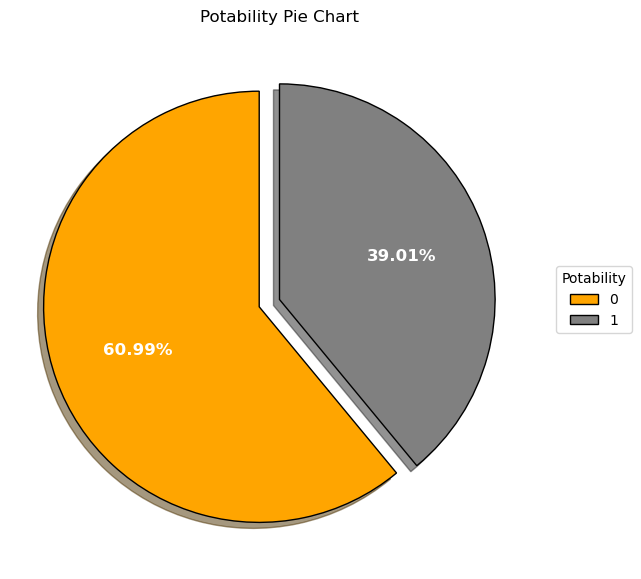

In [11]:
# Show pie plot 

# Creating labels
potabilty_activity = Yc.value_counts().index

# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "grey")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(Yc.value_counts(),
                                  autopct = lambda pct: func(pct, Yc.value_counts()),
                                  explode = explode,
                                  labels = potabilty_activity,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, potabilty_activity,
          title ="Potability",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0, 1))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Potability Pie Chart")
 
# show plot
plt.show()

<font color='green'><i>Class imbalance is an issue in machine learning classification challenges. It simply means that the frequency of the target class is overly unbalanced, i.e., the incidence of one of the classes is unusually high in contrast to the other classes present. In other words, target1 (instance of '0') prefers the majority class over the minority class (instance of '1'). The potability column in our case comprises 1278 occurrences of 1 and 1998 cases of 0. In this sample, the Class-1 to Class-2 incidence ratio is 1278:1998, or 0.64:1. This is unbalanced since 60.99% is 0's and the remaining 39.01% is 1's, leading to this conclusion. In case of any imbalance in data we can use either 'Undersampling' and 'Oversampling'. We want to use the 'Random Oversampling' to compensate for the imbalance in this dataset by producing synthetic samples using k nearest neighbors.</i></font>

<font color='pink'>3.Provide appropriate data visualizations to get an insight about the dataset.</font>

In [12]:
# identifying the NaN values in the imported excel dataset
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
nan_data = water_data.apply(lambda x: sum(x.isnull())).to_frame(name="count")
print(nan_data)

                 count
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0


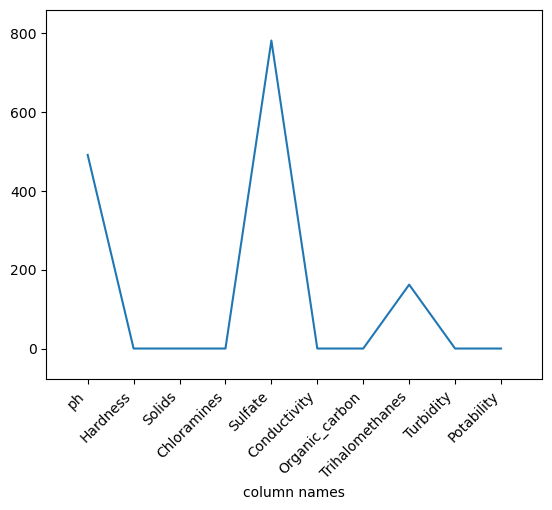

In [14]:
plt.plot(nan_data.index, nan_data['count'])
plt.xticks(nan_data.index, nan_data.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

<font color='green'><i>The count column displays the number of missing values for each parameter. For example, the ph parameter contains 491 missing values, but the Hardness parameter has 0 missing values. This indicates that data for the ph parameter is not accessible or was not recorded for 491 observations, but data for the Hardness parameter is available for all observations.
There are a lot of missing data in the ph, Sulfate, and Trihalomethanes parameters. These missing values may have an effect on any examination of these parameters. Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Turbidity, and Potability have no missing values, suggesting that data for these parameters is available for all observations.</i></font>

In [54]:
water_data_updated = water_data

In [55]:
water_data_updated['Sulfate'] = water_data_updated['Sulfate'].interpolate(method='linear', limit_direction='forward')
water_data_updated['ph'] = water_data_updated['ph'].interpolate(method='linear', limit_direction='forward')
water_data_updated['Trihalomethanes'] = water_data_updated['Trihalomethanes'].interpolate(method='linear', limit_direction='forward')

<font color='pink'>1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any,
handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps
performed in the markdown cell.</font>

In [56]:
nan_data = water_data_updated.apply(lambda x: sum(x.isnull())).to_frame(name="count")
print(nan_data)

                 count
ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0


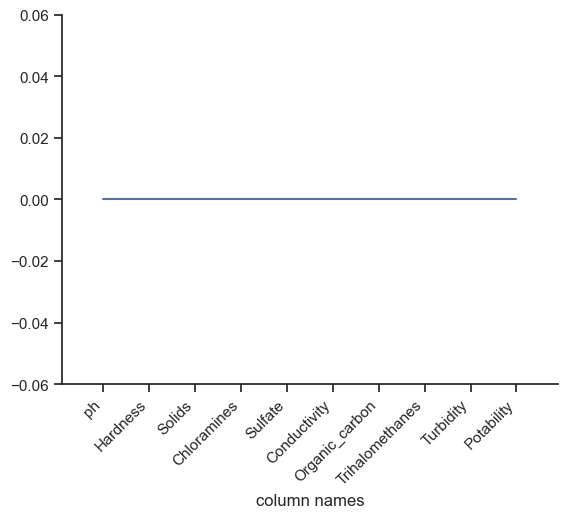

In [57]:
plt.plot(nan_data.index, nan_data['count'])
plt.xticks(nan_data.index, nan_data.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

<i>We must either remove or interpolate the NaN values. We have opted to interpolate the missing data.Interpolation is a method for estimating unknown data points between two known data points. It is often used during data preparation to fill in missing values in a data frame or series. Interpolation may be used to identify missing values/nulls with the help of its neighbors. When the average does not adequately fit the missing statistics, we must resort to an alternative method, which most people consider to be interpolation.</i>

In [58]:
X = water_data_updated.drop(['Potability'], axis=1)
y = water_data_updated['Potability']

In [59]:
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

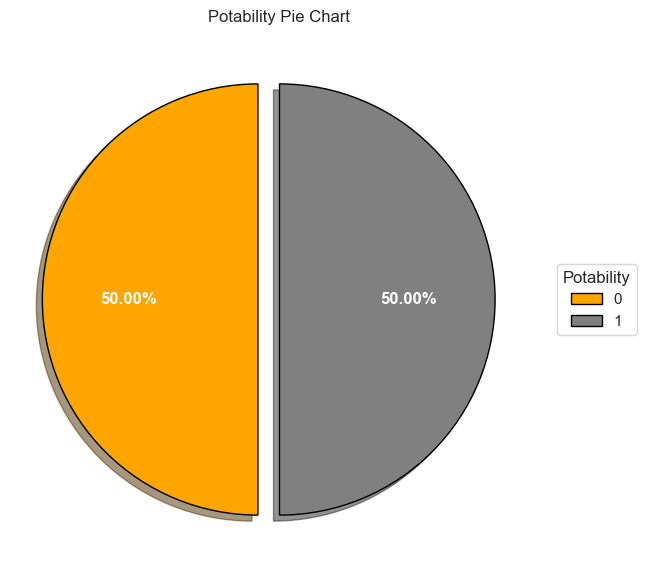

In [60]:
# Show pie plot 

# Creating labels
potabilty_activity = y_res.value_counts().index

# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "grey")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y_res.value_counts(),
                                  autopct = lambda pct: func(pct, y_res.value_counts()),
                                  explode = explode,
                                  labels = potabilty_activity,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, potabilty_activity,
          title ="Potability",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0, 1))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Potability Pie Chart")
 
# show plot
plt.show()

<i>Random sampling was used to narrow the gap between the binary data 0's and 1's on the Potability column.</i>

<font color='green'><i>We may evaluate each column of the dataframe after interpolation and sampling to determine the distribution and properties of the data. Visualization approaches for examining data in a column for visualizations like as histograms and box plots, as well as statistical tests to evaluate whether there are any significant differences or correlations between the data in various columns</i></font>

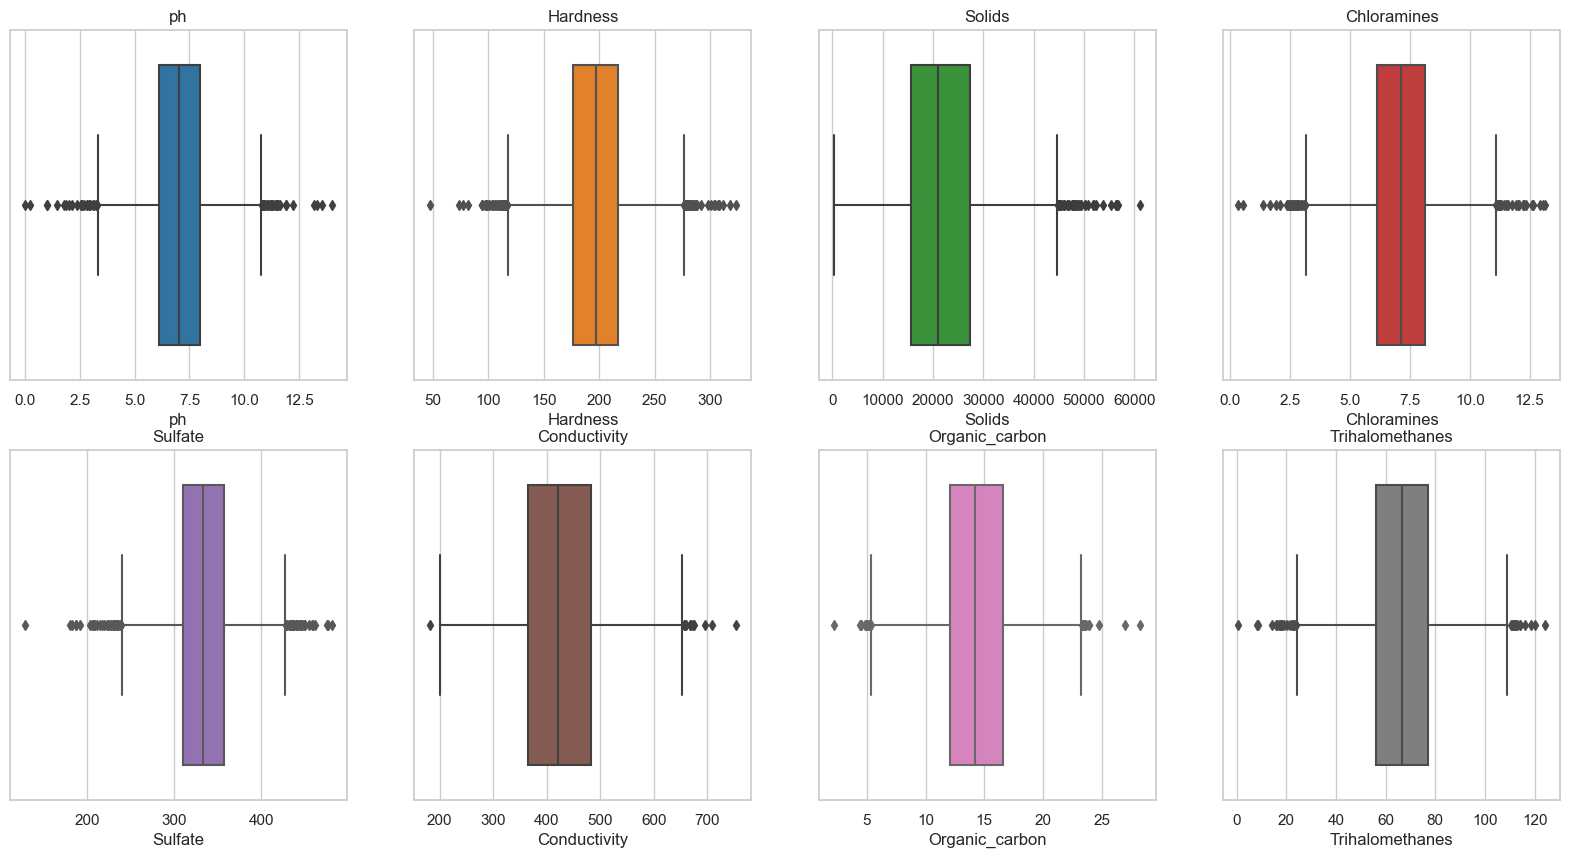

C:\Users\user\AppData\Local\Temp\ipykernel_8060\2091138782.py:24: DeprecationWarning: deprecated
  warnings.warn("deprecated", DeprecationWarning)


In [92]:
# method to generate visualizations for the data

#  Check for data charateristics

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
sb.set_style("whitegrid")
i,j,ncol = 0,0,0
colors =list(mcolors.TABLEAU_COLORS.values())

n_water_data_updated = water_data_updated.iloc[:,:8]

for var in n_water_data_updated:
    tmp = n_water_data_updated[var]
    sb.boxplot(tmp, ax=axes[i][j], color = colors[ncol])
    axes[i][j].set_title(var)
    j = j+1
    ncol = ncol + 1
    if j>=4:
        i = i+1
        j = j%4
plt.show()

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    fxn()

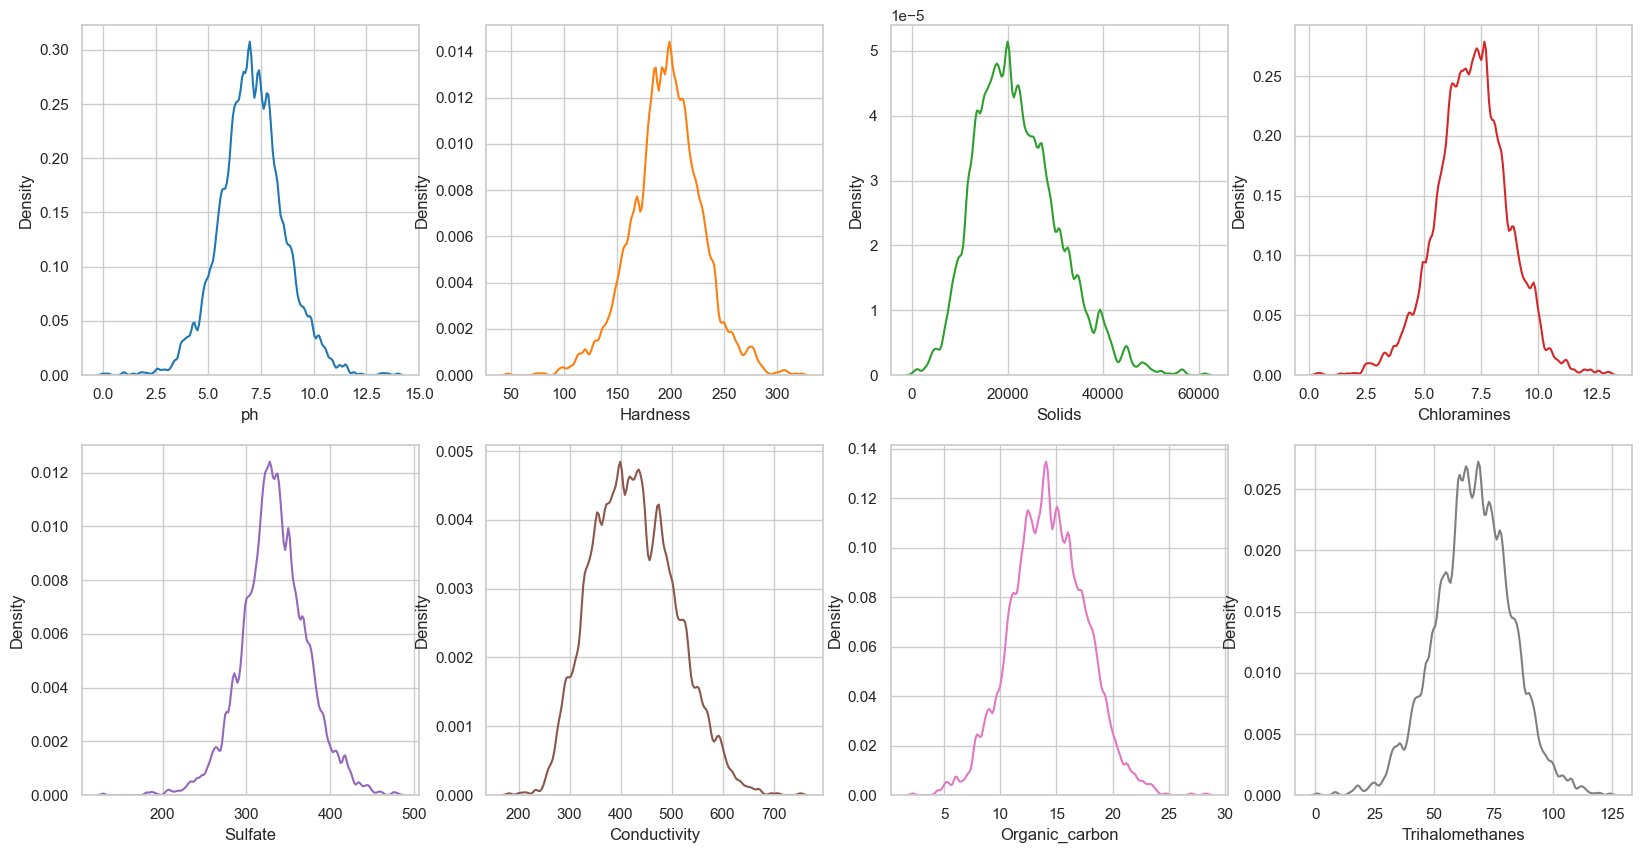

In [62]:
# method to generate visualizations for the data

#  Check for Density

fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (20,10))
sb.set_style("whitegrid")
i,j,ncol = 0,0,0
colors =list(mcolors.TABLEAU_COLORS.values())

n_water_data_updated = water_data_updated.iloc[:,:8]

for var in n_water_data_updated:
    tmp = n_water_data_updated[var]
    sb.kdeplot(tmp, ax=axes[i][j], color = colors[ncol], bw_adjust=.3)
    j = j+1
    ncol = ncol + 1
    if j>=4:
        i = i+1
        j = j%4
plt.show()

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

<font color='green'><i>These visualizations can assist us grasp the data's form, center, and dispersion. We discovered that the distributions of all numerical variables are almost symmetrical, implying that the data is spread evenly on both sides of the center.
 'Solids' is the sole variable having a somewhat skewed distribution. This might be because of the occurrence of outliers, which are extreme numbers that can have an impact on the overall distribution of the data.
We also noted that we are now examining the goal variable 'Potability,' which is a binary factor with values '0' and '1'. To understand how this variable is distributed, we may examine the frequency of each level in the dataset.</i></font>

<i>We are attempting to investigate and evaluate the potential correlations between the variables, namely the category variable 'Potability' and the numerical variables. To do this, we are creating a pairings plot matrix.
A pairs plot matrix is a grid of scatter plots that illustrates the connection between two variables. We are displaying the density functions of each variable in respect to the 'Potability' class to which they belong in the diagonal of the matrix. This indicates that we are charting the distribution of each numerical variable for each level of the 'Potability' variable.
We are constructing scatter plots outside the diagonal to demonstrate the relationship between two numerical variables. On the x-axis of each scatter plot is one numerical variable, and on the y-axis is another. The scatter plot's points represent observations from our dataset, and their placement in the plot demonstrates the relationship between the two variables. 
This graphic can assist us in comprehending how the numerical variables connect to one another and to the 'Potability' variable.</i>

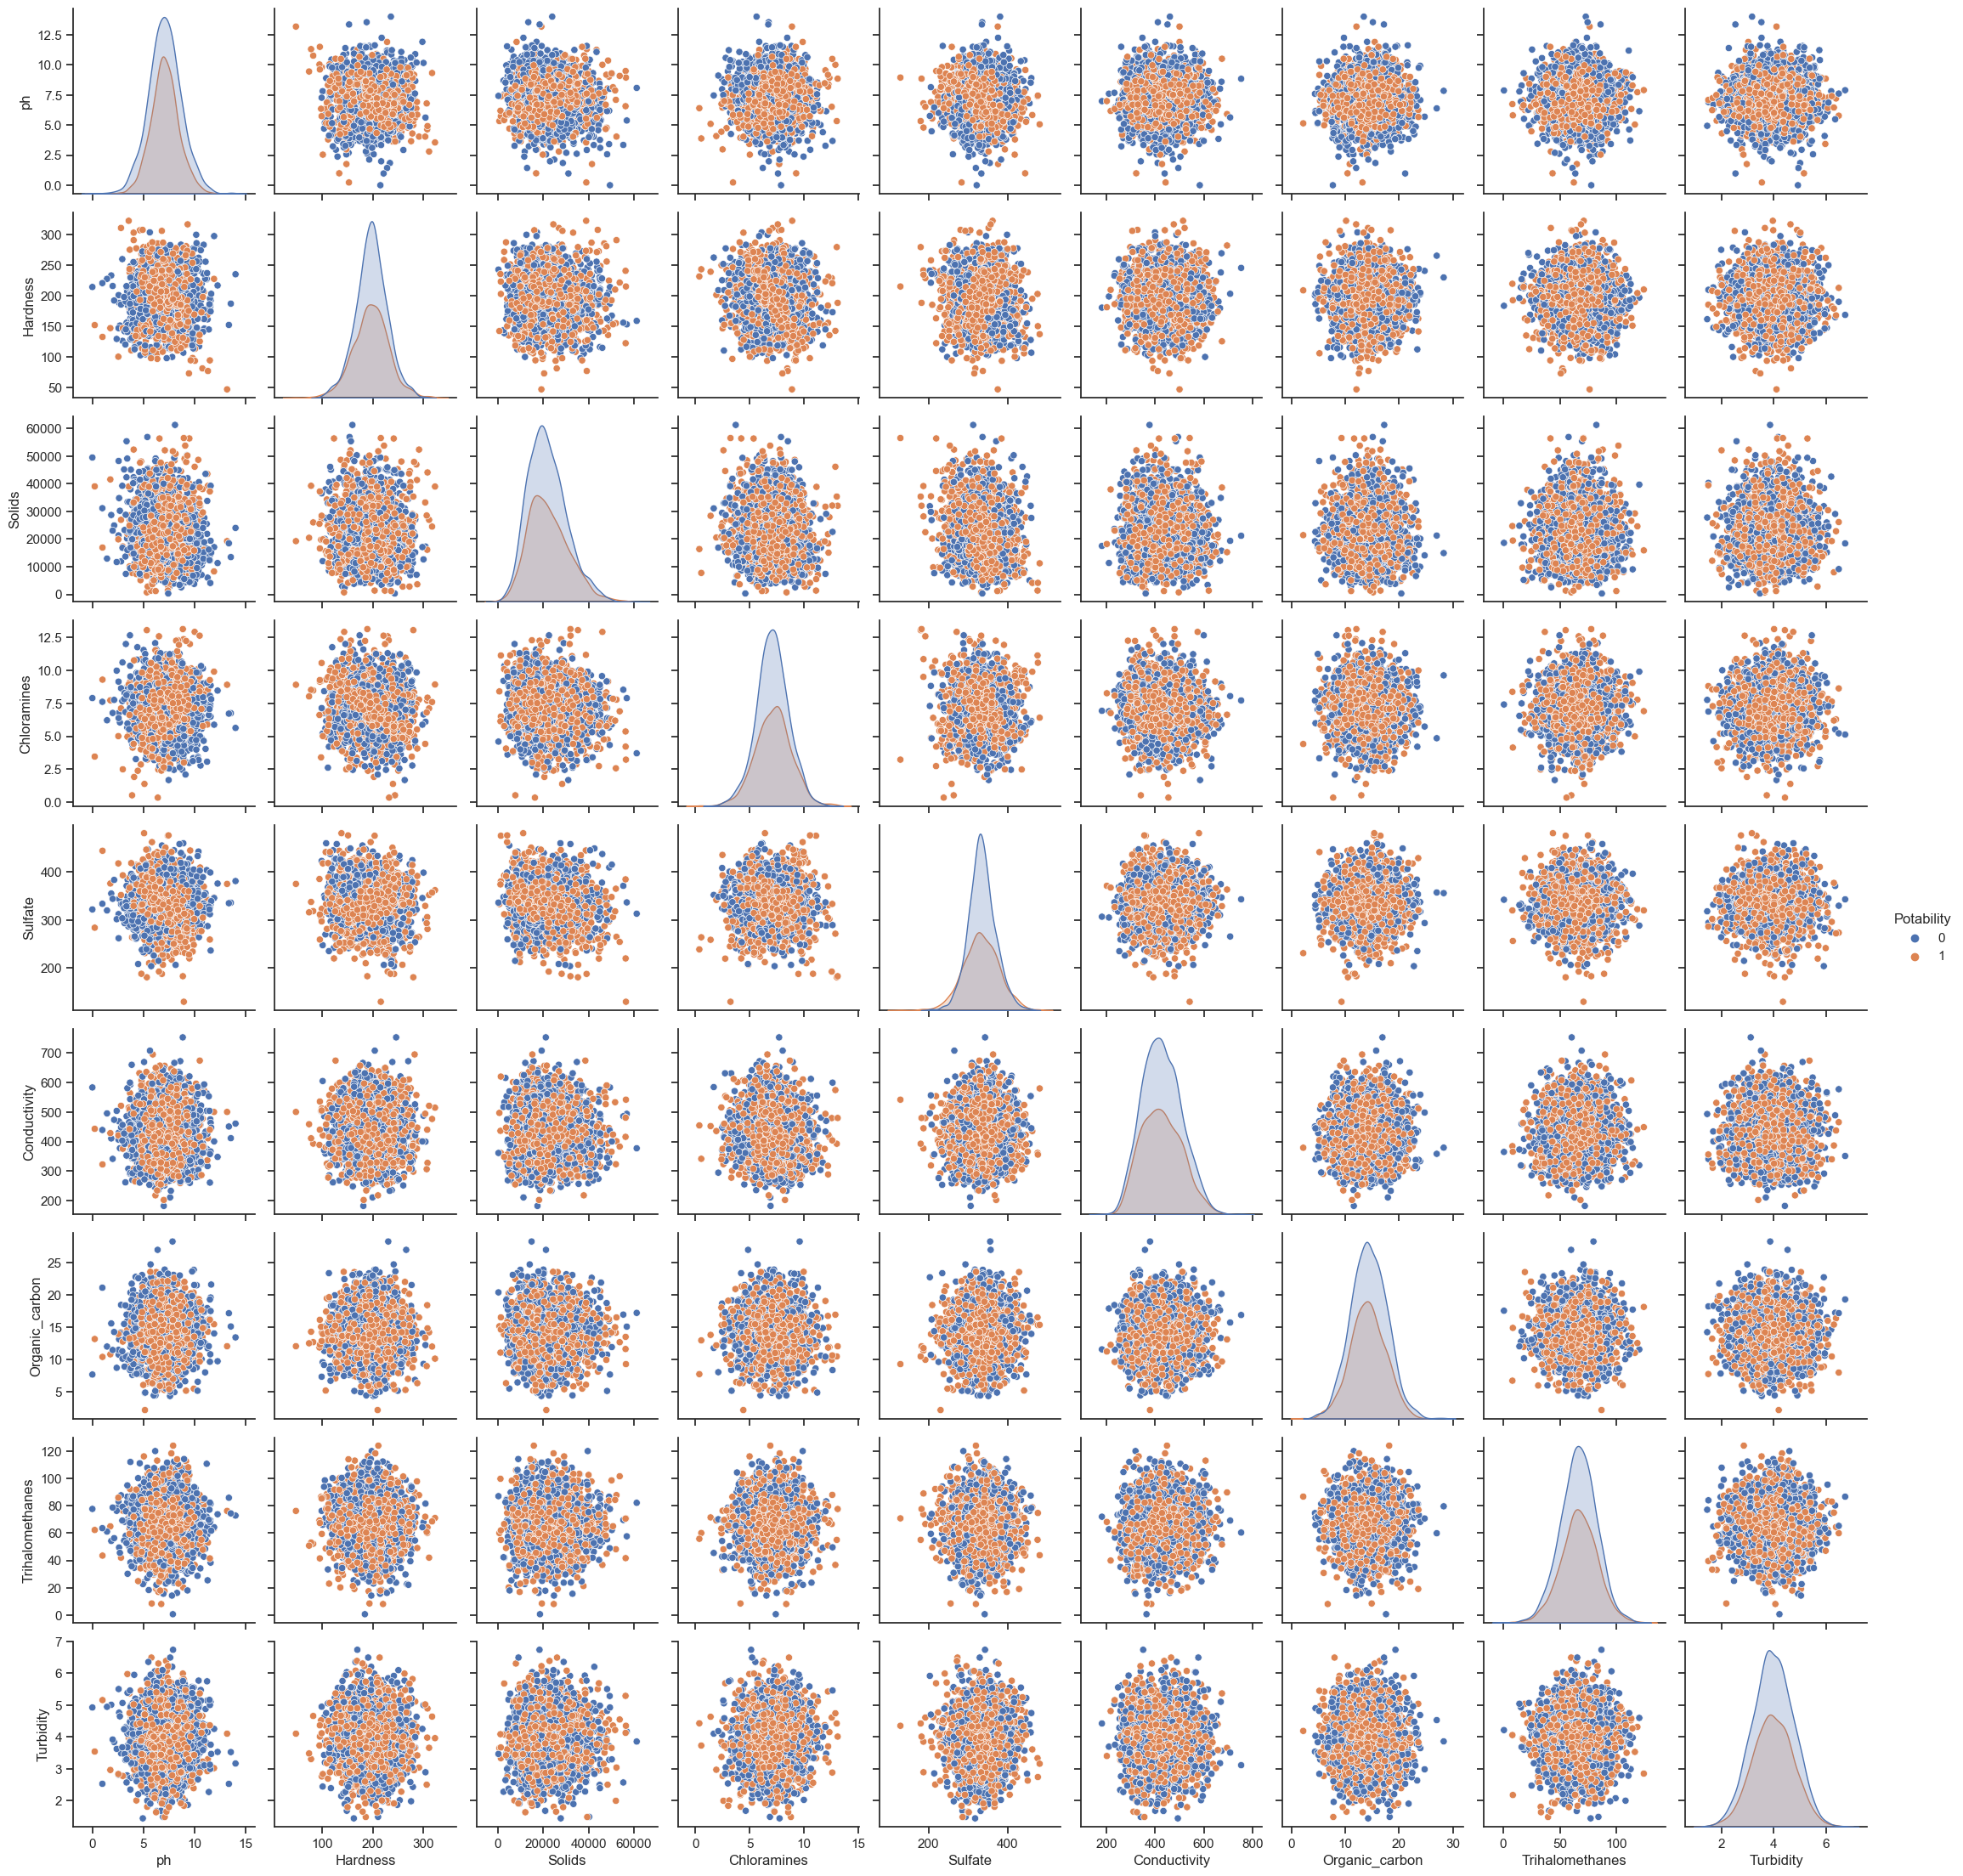

In [63]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="ticks", rc=custom_params)
sb.pairplot(water_data_updated, hue="Potability")
plt.show()

<i>No distinct clusters exist for the 'Potability' categorical variable, making it difficult to visually distinguish between levels. Further analysis in a multi-dimensional space may help understand the relationship between variables. Collinearity is investigated by examining the covariance matrix and detecting high correlation values.</i>

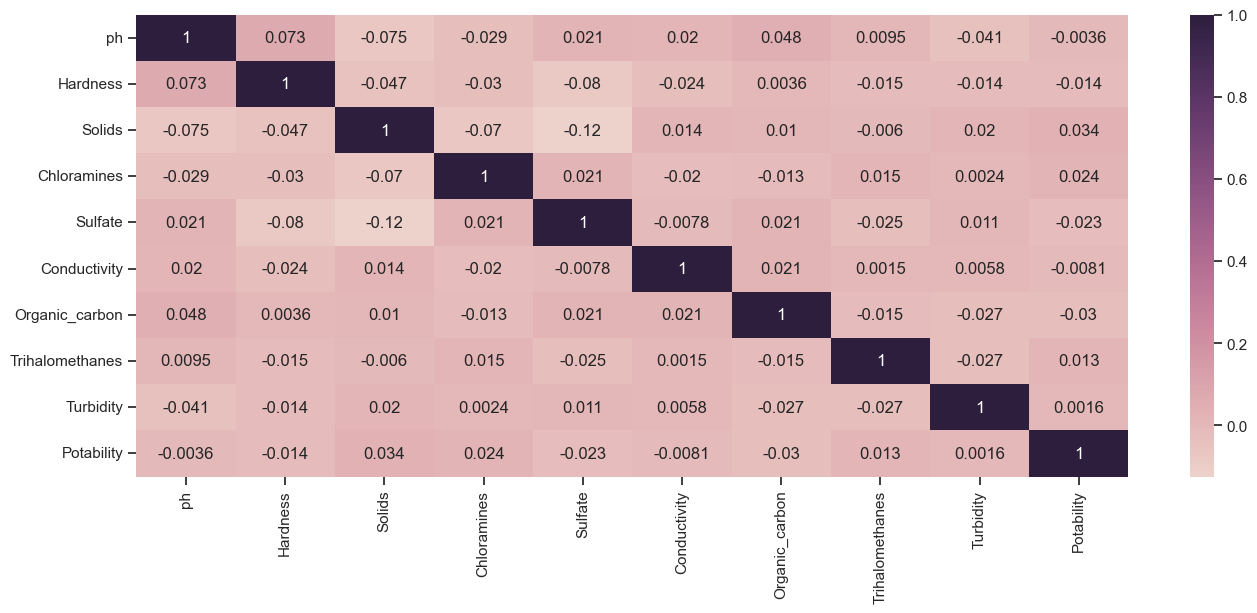

In [64]:
# CORRELATION MATRIX
plt.figure(figsize=(16, 6))
sb.heatmap(water_data_updated.corr(),annot=True,cmap=sb.cubehelix_palette(as_cmap=True))
plt.show()

<font color='green'><i>We may conclude that there is no collinearity since all of the variables are two by two extremely uncorrelated.</i></font>

In [65]:
# Variation Inflaction Factor (VIF)

clean_data =n_water_data_updated.fillna(n_water_data_updated.mean())

X = add_constant(clean_data)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const              241.942944
ph                   1.014795
Hardness             1.016791
Solids               1.029844
Chloramines          1.007954
Sulfate              1.025283
Conductivity         1.002100
Organic_carbon       1.003698
Trihalomethanes      1.001572
dtype: float64

<i>Some variables had missing values, especially the 'Sulfate' variable, which had about one-third of its data missing. A Python script was created to scale the data and allow for the removal of a variable with missing values or a proportion of missing observations in order to understand the impact of these missing values. The missing data can be filled up with a statistically significant value, such as the mean or median. Machine learning models will be assessed on several datasets produced from the baseline dataset using both supervised and unsupervised learning approaches.</i>

<font color = 'sky blue'><i>Grid Search with Cross Validation is a method for determining the optimum hyperparameters for a model.Grid Search is used to select a model's hyperparameters, whereas Cross-Validation is used to assess the model's performance on a specific set of hyperparameters by running it on data other than the training dataset.GridSearchCV performs cross-validation in addition to Grid Search. When training the model, cross-validation is utilized. We divide the data into two pieces before training the model with it: train data and test data. </i></font>

In [66]:
water_data_updated.ph.fillna(water_data_updated.ph.median(),inplace=True)
water_data_updated.Trihalomethanes.fillna(water_data_updated.Trihalomethanes.median(),inplace=True)

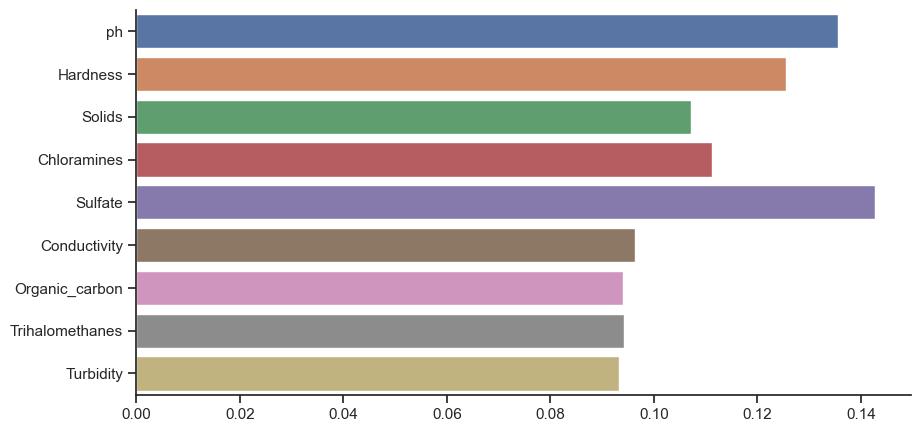

In [67]:
#initializing the model
rf= RandomForestClassifier()
rf.fit(water_data_updated.drop('Potability',axis=1),water_data_updated.Potability)
plt.figure(figsize=(10,5))
sb.set_theme(style="ticks", rc=custom_params)
sb.barplot(x=rf.feature_importances_,y=water_data_updated.drop('Potability',axis=1).columns)
plt.show()


<i>Because the above plot yields no relevance, all of the input variables are examined for prediction.We will now divide the dataset into train and test sets. To do this, we employ another tool module function: the split function. By giving the index for the target variable, we were able to split the dataset into train, validation, and test sets all at once. This program uses scikit-learn's train_test_split() function to split the dataset.</i>

## Logistic Regression

<font color='pink'>2. Apply appropriate feature engineering techniques for them. Apply the feature transformation
techniques like Standardization, Normalization, etc. You are free to apply the appropriate
transformations depending upon the structure and the complexity of your dataset. Provide
proper justification. Techniques used without justification will not be awarded marks</font>

In [68]:
#splitting the data into input and output
x = water_data_updated.drop(['Potability','Organic_carbon'],axis=1)
y = water_data_updated.Potability
scalar = StandardScaler()
x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

<font color='green'><i>Here we are going to transform the whole data into a standardized form.</i></font>

In [69]:
nan_data = water_data_updated.apply(lambda x: sum(x.isnull())).to_frame(name="count")
print(nan_data)

                 count
ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0


<font color='pink'>1. Split the dataset into training and test sets. Justify your choice of split. You may experiment
with different split to get the final split. Answer without justification will not be awarded
marks.</pink>

In [70]:
# Splitting the data 50% to train and 50% test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=1)
print('x_train={},y_train={},x_test={},y_test={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

x_train=(1638, 8),y_train=(1638,),x_test=(1638, 8),y_test=(1638,)


<font color='sky blue'><i>Logistic Regression is a statistical approach for modeling the connection between one or more independent variables and a dependent variable. It is frequently employed in classification issues in which the aim is to anticipate which of two potential classes an instance belongs to. If the likelihood of an instance belonging to the positive class is greater than 0.5, the instance is categorized as positive; otherwise, it is classified as negative. Logistic Regression is therefore a binary classifier. </i></font>

<font color='pink'>2. Build Model Development using Logistic Regression with penalty= l1 and l2,
C= [1,0.5,0.1,0.01,0.003] . Identify the best parameter and justify your answer.</font>

In [111]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],            
    'C': [1, 0.5, 0.1, 0.01, 0.003],  
    'solver': ['liblinear'] 
    }

lgs_fit = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = param_grid,
    cv = 3, 
    verbose = 3,
    n_jobs = -1
)

In [112]:
pred_lgs = lgs_fit.fit(X_train,y_train).predict(X_test)
acc_logis = accuracy_score(y_test,pred_lgs)

print(acc_logis)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
0.615995115995116


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueErr

In [178]:
# Print classification Report

print('Classification Report: \n',classification_report(y_test,pred_lgs))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.99      0.76      1005
           1       0.62      0.02      0.03       633

    accuracy                           0.62      1638
   macro avg       0.62      0.50      0.40      1638
weighted avg       0.62      0.62      0.48      1638



<font color='pink'>2. Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. Answer without justification will not be awarded marks.</font>

confusion matrix:


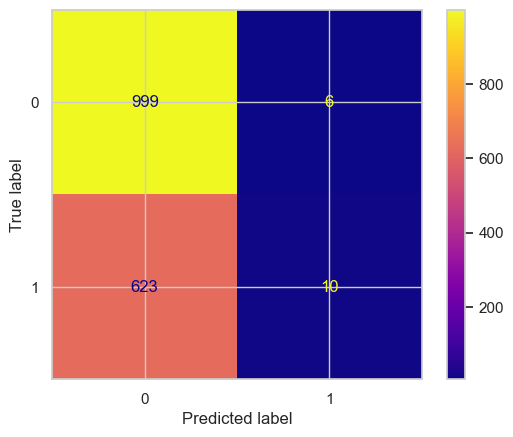

ROC curve :


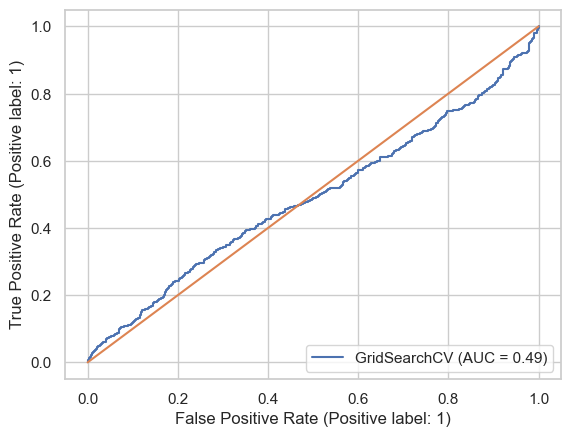

In [179]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(lgs_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(lgs_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

<font color='green'><i>The model had an overall accuracy of 0.62 in this report, which means it correctly identified 62% of the samples. The accuracy for class 0 is 0.62, which means that 62% of the samples projected to be class 0 were accurately categorised. The recall for class 0 is 0.99, which means that nearly all samples in class 0 were properly categorized. Class 0 has a f1-score of 0.76, which is the harmonic mean of accuracy and recall. The accuracy for class 1 is similarly 0.62, indicating that 62% of the samples projected as class 1 were accurately identified. However, the recall for class 1 is only 0.02, implying that only a very tiny proportion of class 1 samples were properly categorized. Class 1 has a f1-score of only 0.03, suggesting low performance. The macro average and weighted average offer a high-level overview of the model's performance in both classes. The macro average computes the metric's average for each class without considering the number of samples in each class, whereas the weighted average considers the number of samples in each class. According to this classification report, while the model has an overall accuracy of 0.62 and performs well in categorizing data from class 0, it performs badly in classifying samples from class 1. </i></font>

## DecisionTree Classifier

In [180]:
# initializing
dec_fit = DecisionTreeClassifier()

#fitting and predicting for test data
pred_dec_ = dec_fit.fit(X_train,y_train).predict(X_test)

In [181]:
print(pred_dec_)

[1 0 0 ... 1 1 0]


In [182]:
# Print classification Report

print('Classification Report: \n',classification_report(y_test,pred_dec_))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.62      0.64      1005
           1       0.45      0.49      0.47       633

    accuracy                           0.57      1638
   macro avg       0.55      0.55      0.55      1638
weighted avg       0.58      0.57      0.57      1638



confusion matrix:


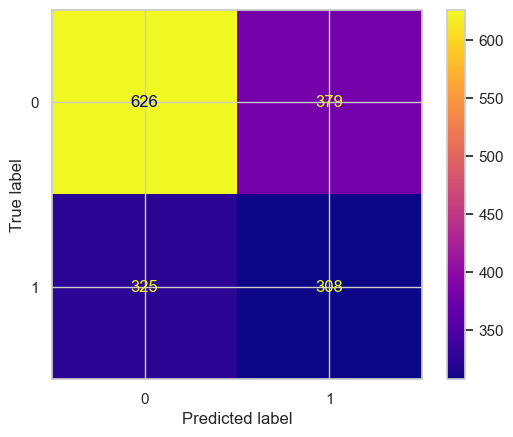

ROC curve :


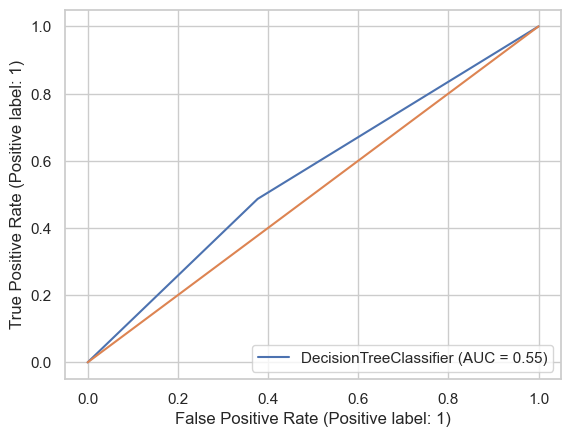

In [183]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(dec_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(dec_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

<font color='green'><i>The total accuracy of the model is 0.57, which means that it properly identified 57% of the samples. The accuracy for class 0 is 0.66, which means that 66% of the samples projected to be class 0 were properly categorized. The recall for class 0 is 0.63, which means that 63% of class 0 samples were properly categorized. Class 0 has a f1-score of 0.64, which is the harmonic mean of accuracy and recall. The precision for class 1 is 0.45, which means that 45% of the samples predicted as class 1 were properly categorized. The recall for class 1 is 0.49, which means that 49% of class 1 samples were correctly categorized. Class 1 has a f1-score of 0.47. The macro average and weighted average offer a high-level overview of the model's performance in both classes. The macro average computes the metric's average for each class without considering the number of samples in each class, whereas the weighted average considers the number of samples in each class.
 In summary, the model has an overall accuracy of 0.57 and performs relatively well in categorizing samples from both groups, according to this classification report.</i></font>

## KNN model

In [184]:
# initializing
knn_fit = KNeighborsClassifier()

#fitting and predicting for test data
pred_knn_ = knn_fit.fit(X_train,y_train).predict(X_test)

In [185]:
print(pred_dec_)

[1 0 0 ... 1 1 0]


In [186]:
# Print classification Report

print('Classification Report: \n',classification_report(y_test,pred_knn_))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      1005
           1       0.55      0.42      0.48       633

    accuracy                           0.64      1638
   macro avg       0.61      0.60      0.60      1638
weighted avg       0.63      0.64      0.63      1638



confusion matrix:


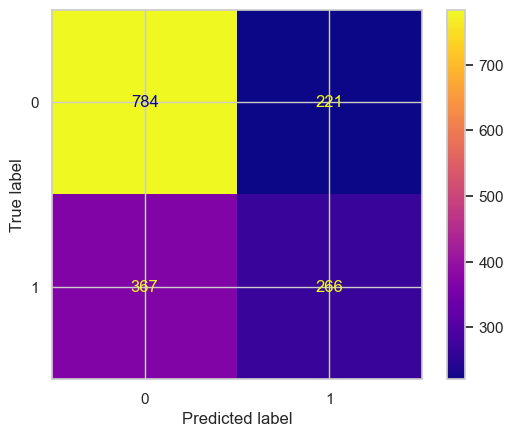

ROC curve :


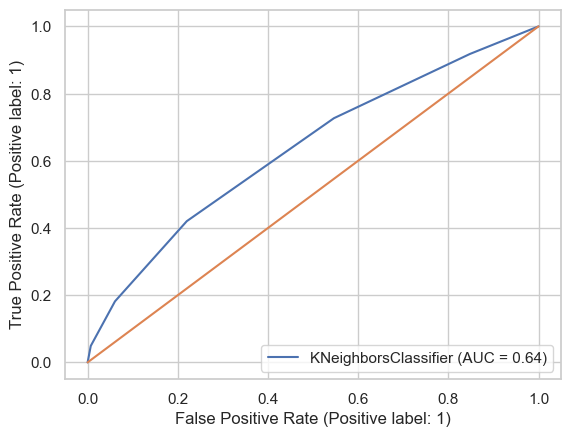

In [187]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(knn_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(knn_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

<font color='green'><i>The report displays measures like as precision, recall, and f1-score for each class (0 and 1), as well as the model's overall accuracy. The model had an overall accuracy of 0.64 in this report, which means it correctly identified 64% of the samples. The accuracy for class 0 is 0.68, which means that 68% of all samples projected to be class 0 were properly categorized. The recall for class 0 is 0.78, which means that 78% of class 0 samples were correctly categorized. Class 0 has a f1-score of 0.73, which is the harmonic mean of accuracy and recall.
The accuracy for class 1 is 0.55, which means that 55% of the samples predicted as class 1 were properly categorized. The recall for class 1 is 0.42, which means that 42% of class 1 samples were properly categorized. Class 1 has a f1-score of 0.48. The macro average and weighted average offer a high-level overview of the model's performance in both classes. The macro average computes the metric's average for each class without considering the number of samples in each class, whereas the weighted average considers the number of samples in each class. In conclusion, this classification report shows that the model has an overall accuracy of 0.64 and performs relatively well in identifying data from both classes.</i></font>

## Random Forest Model

In [188]:
# initializing
rf_fit = RandomForestClassifier()

#fitting and predicting for test data
pred_rf_ = rf_fit.fit(X_train,y_train).predict(X_test)

In [189]:
print(pred_rf_)

[1 0 0 ... 0 0 0]


In [190]:
# Print classification Report

print('Classification Report: \n',classification_report(y_test,pred_rf_))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.86      0.76      1005
           1       0.61      0.34      0.44       633

    accuracy                           0.66      1638
   macro avg       0.64      0.60      0.60      1638
weighted avg       0.65      0.66      0.63      1638



confusion matrix:


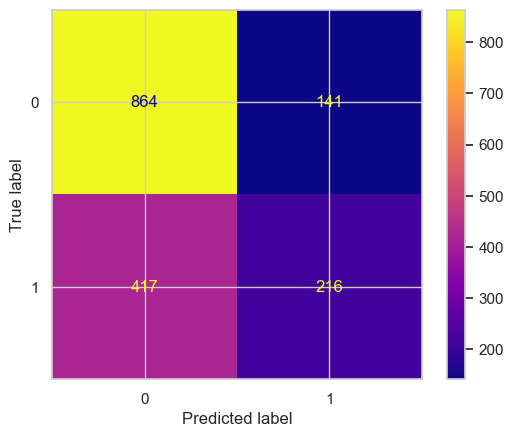

ROC curve :


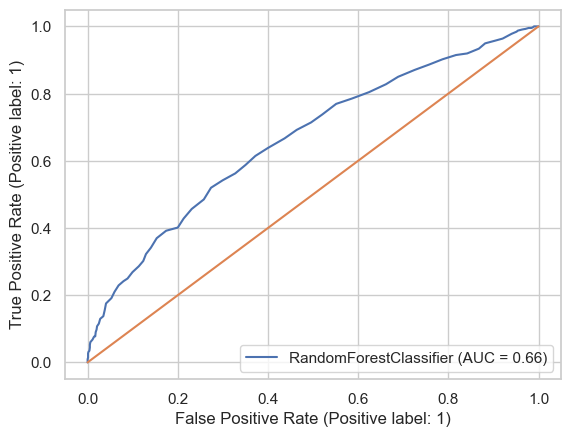

In [191]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(rf_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(rf_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

<font color='green'>The report displays measures like as precision, recall, and f1-score for each class (0 and 1), as well as the model's overall accuracy.The model had an overall accuracy of 0.67 in this report, which means it correctly identified 67% of the samples. The accuracy for class 0 is 0.68, which means that 68% of all samples projected to be class 0 were properly categorized. The recall for class 0 is 0.85, which means that 85% of class 0 samples were correctly categorized. Class 0 has a f1-score of 0.76, which is the harmonic mean of accuracy and recall. The accuracy for class 1 is 0.61, which means that 61% of the samples predicted as class 1 were accurately categorised. The recall for class 1 is 0.37, which means that only 37% of class 1 samples were properly categorized. Class 1 has a f1-score of 0.46. The macro average and weighted average offer a high-level overview of the model's performance in both classes. The macro average computes the metric's average for each class without considering the number of samples in each class, whereas the weighted average considers the number of samples in each class. In conclusion, this classification report shows that the model has an overall accuracy of 0.67 and performs relatively well in categorizing data.<i></i></font>

## XGBoost model

In [192]:
# initializing
XG_fit = XGBClassifier()

#fitting and predicting for test data
pred_XG_ = XG_fit.fit(X_train,y_train).predict(X_test)

In [193]:
print(pred_XG_)

[1 1 0 ... 0 0 0]


In [194]:
XG_fit.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [216]:

#hyper parameters
params = {'max_depth':[5,10,15],
          'learning_rate':[0.001,0.01,0.1],
          'n_estimators':[350,400,500]
         }

#initializing the grid
grid_xgb = GridSearchCV(estimator=XG_fit,param_grid=params,cv=3,verbose=3,n_jobs=-1)

In [196]:
pred_XG_ = grid_xgb.fit(X_train,y_train).predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [197]:
print(pred_XG_)

[0 0 0 ... 0 0 0]


In [198]:
# Print classification Report

print('Classification Report: \n',classification_report(y_test,pred_XG_))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.88      0.76      1005
           1       0.60      0.29      0.39       633

    accuracy                           0.65      1638
   macro avg       0.63      0.59      0.57      1638
weighted avg       0.64      0.65      0.62      1638



confusion matrix:


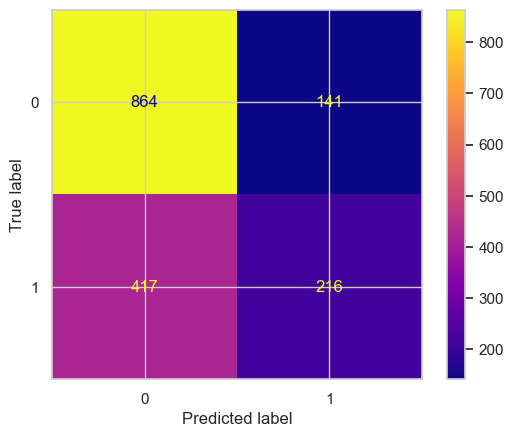

ROC curve :


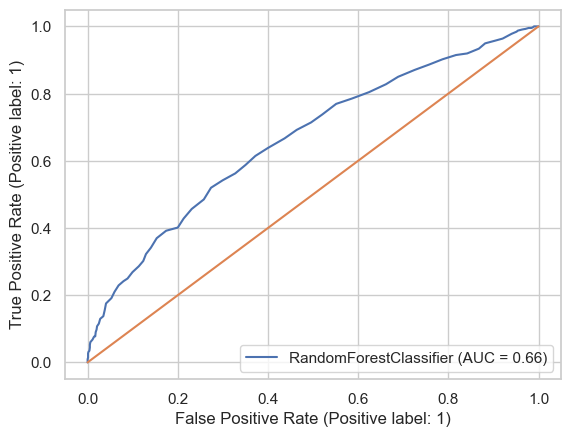

In [199]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(rf_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(rf_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

<font color='green'><i>The report displays measures like as precision, recall, and f1-score for each class (0 and 1), as well as the model's overall accuracy. The model had an overall accuracy of 0.65 in this report, which means it correctly identified 65% of the samples. The accuracy for class 0 is 0.66, which means that 66% of the samples projected to be class 0 were properly categorized. The recall for class 0 is 0.88, which means that 88% of class 0 samples were correctly categorized. Class 0 has a f1-score of 0.76, which is the harmonic mean of accuracy and recall.
The accuracy for class 1 is 0.60, which means that 60% of the samples predicted as class 1 were properly categorized. The accuracy for class 1 is 0.60, which means that 60% of the samples predicted as class 1 were properly categorized. The recall for class 1 is low 0.29, which means that only 29% of class 1 samples were properly categorized. Class 1 has a f1-score of just 0.39. The macro average computes the metric's average for each class without considering the number of samples in each class, whereas the weighted average considers the number of samples in each class. In summary, this classification report shows that, while the model has an overall accuracy of 0.65 and performs well when categorizing data from class 0, it performs badly when classifying samples from class 1. </i></font>

## SVM model

In [200]:
# initializing
svm_fit = SVC()

#fitting and predicting for test data
pred_svm_ = svm_fit.fit(X_train,y_train).predict(X_test)

In [201]:
#checking hyper parameters
svm_fit.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [202]:
params = {'C':[1,0.5,0.1,0.01,0.003],
          'kernel':['linear', 'poly', 'rbf']}


#initializing the grid
grid_svm = GridSearchCV(estimator=svm_fit,param_grid=params,cv=3,verbose=3,n_jobs=-1)

In [203]:
pred_SVM_ = grid_svm.fit(X_train,y_train).predict(X_test)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [204]:
# Print classification Report
print(pred_SVM_)
print('Classification Report: \n',classification_report(y_test,pred_XG_))

[0 0 0 ... 0 0 0]
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.88      0.76      1005
           1       0.60      0.29      0.39       633

    accuracy                           0.65      1638
   macro avg       0.63      0.59      0.57      1638
weighted avg       0.64      0.65      0.62      1638



confusion matrix:


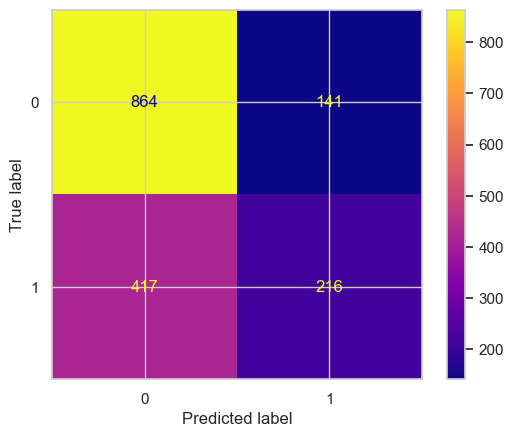

ROC curve :


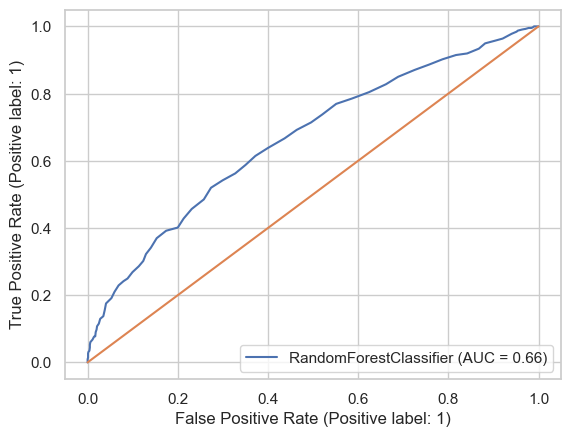

In [205]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(rf_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(rf_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

<font color='green'><i>The report displays measures like as precision, recall, and f1-score for each class (0 and 1), as well as the model's overall accuracy.
 The model had an overall accuracy of 0.65 in this report, which means it correctly identified 65% of the samples. The accuracy for class 0 is 0.66, which means that 66% of the samples projected to be class 0 were properly categorized. The recall for class 0 is 0.88, which means that 88% of class 0 samples were correctly categorized. Class 0 has a f1-score of 0.76, which is the harmonic mean of accuracy and recall. The accuracy for class 1 is 0.60, which means that 60% of the samples predicted as class 1 were properly categorized. The recall for class 1 is low 0.29, which means that only 29% of class 1 samples were properly categorized. Class 1 has a f1-score of just 0.39. The macro average and weighted average offer a high-level overview of the model's performance in both classes. The macro average computes the metric's average for each class without considering the number of samples in each class, whereas the weighted average considers the number of samples in each class. In summary, this classification report shows that, while the model has an overall accuracy of 0.65 and performs well when categorizing data from class 0, it performs badly when classifying samples from class 1.

The array [0 0 0... 0 0 0] you gave looks to be an array of model predictions, with each member being a sample's expected class label.</i></font>

##  Gradient Boosting Classifier

In [206]:
grade_fit =  GradientBoostingClassifier(
    loss='exponential',
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=4,
    n_estimators=316,
    learning_rate=0.1,
    criterion='friedman_mse',
    random_state=42)

pred_gbc_ = grade_fit.fit(X_train,y_train).predict(X_test)

In [207]:
print(pred_gbc_)

[1 0 0 ... 0 0 0]


In [208]:
print('Classification Report: \n',classification_report(y_test,pred_gbc_))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.84      0.75      1005
           1       0.59      0.37      0.46       633

    accuracy                           0.66      1638
   macro avg       0.63      0.60      0.60      1638
weighted avg       0.64      0.66      0.64      1638



confusion matrix:


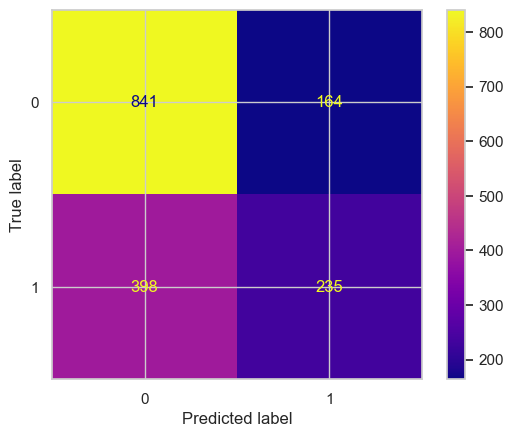

ROC curve :


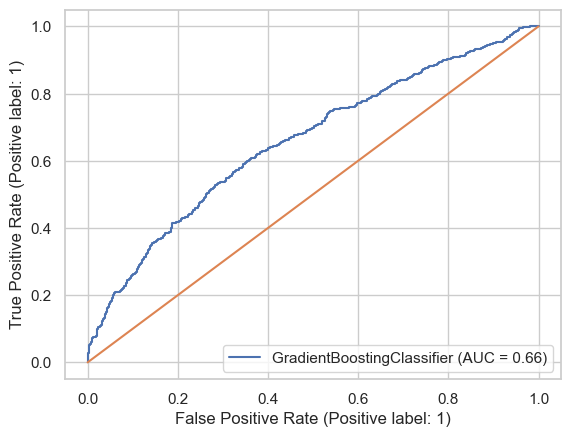

In [209]:
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grade_fit,X_test,y_test,cmap='plasma')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grade_fit,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

## Models Evaluation

Here, we will select the optimal model that performs the best on the test set by comparing the metrics acquired in a table.

In [211]:
#accuracy score Logistic Regression
acc_lgs = accuracy_score(y_test,pred_lgs)
print(acc_lgs)

0.615995115995116


In [212]:
#accuracy score DecisionTree Classifier
acc_dec_ = accuracy_score(y_test,pred_dec_)
print(acc_dec_)

0.5702075702075702


In [213]:
#accuracy score XGBoost
acc_XG_ = accuracy_score(y_test,pred_XG_)
print(acc_XG_)

0.652014652014652


In [214]:
#accuracy score SVM
acc_svm_ = accuracy_score(y_test,pred_svm_)
print(acc_svm_)

0.6807081807081807


In [215]:
#accuracy score Gradient Boosting Classifier

acc_gbc_ = accuracy_score(y_test,pred_gbc_)
print(acc_gbc_)

0.6568986568986569


In [219]:
#accuracy score Gradient Random Forest Model

acc_rf_ = accuracy_score(y_test,pred_rf_)
print(acc_rf_)

0.6593406593406593


## Conlcusion

<font color='green'><i>The SVM is having better accuracy than Logistic Regression, however for other models such as GBClassifer, Random Forest Model and DecisionTree Classifier are among the same range. The accuracy of Logistic regression is <u>0.615995115995116</u></i></font>

<font color='green'><i> When a model is overly simple, it fails to reflect the underlying patterns in the data. It frequently leads to strong bias and low variance. Because it fails to generalize properly, an underfit model may perform badly on both the training and test sets. Overfitting occurs when a model grows too complicated and begins to remember the training data rather than understanding the underlying patterns. Overfitting is distinguished by a low bias but a high variance. While an overfit model may perform near-perfectly on the training set, it usually performs badly on unobserved data. In our case we haven't seen much deviation so we haven't performed underfitting or overfitting techniques</i></font>